# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import statsmodels
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Importing the dataset

In [2]:
dataset = pd.read_csv('Data_Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
cor_dataset = pps.matrix(dataset)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 member

### Checking the PPS score for co-relation

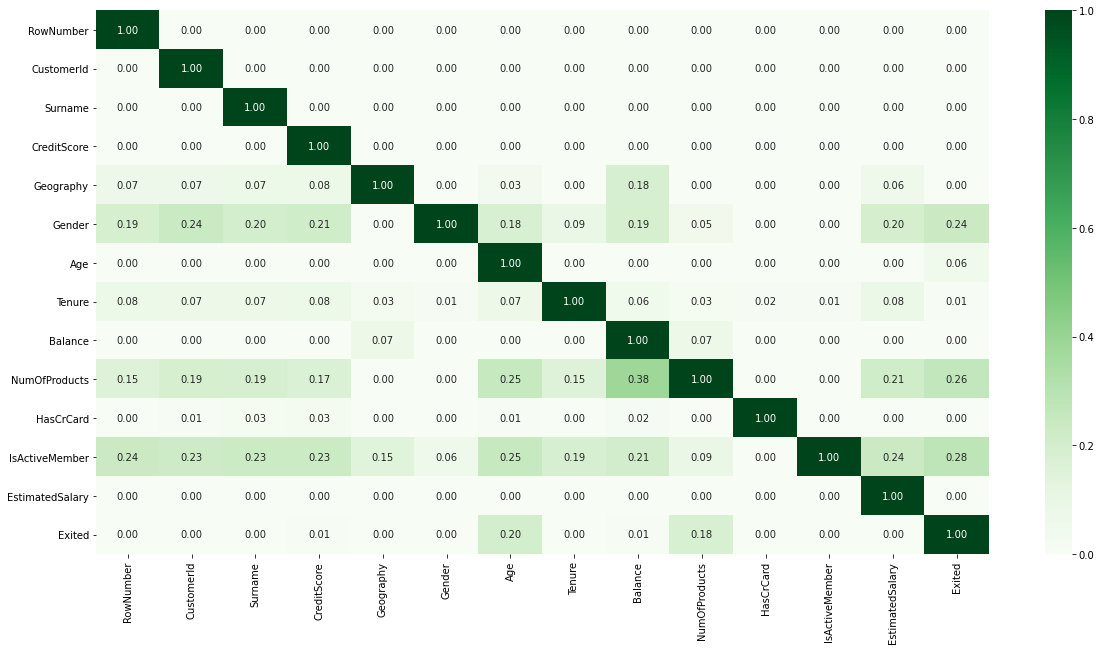

In [4]:
plt.figure(figsize=[20,10])
sns.heatmap(cor_dataset, cmap='Greens', annot=True, fmt = '.2f')
plt.show()

In [5]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [6]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [7]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

In [8]:
from statsmodels.tools import categorical
X[:,2] = categorical(X[:, 2]).reshape(-1,3)[:,2]

In [9]:
print(X)

[[619 'France' 0.0 ... 1 1 101348.88]
 [608 'Spain' 0.0 ... 0 1 112542.58]
 [502 'France' 0.0 ... 1 0 113931.57]
 ...
 [709 'France' 0.0 ... 0 1 42085.58]
 [772 'Germany' 1.0 ... 1 0 92888.52]
 [792 'France' 0.0 ... 1 0 38190.78]]


In [10]:
cat = categorical(X[:, 1]).reshape(-1,4)[:,1:].reshape(-1,3)

In [11]:
X = X[:,2:]

In [12]:
X = np.hstack((cat,X))
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[1,:])

[-1.002002    1.72974448 -0.57504086  0.91186722 -0.27382717  0.35390313
  0.2854211   0.81371262  0.64531434  0.96293637 -1.55587522]


### Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

### Adding the input layer and hidden layers

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='tanh'))

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='tanh'))

In [18]:
ann.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))

In [19]:
ann.add(tf.keras.layers.Dense(units=6, activation='tanh'))

In [20]:
ann.add(tf.keras.layers.Dropout(.2, input_shape=(2,)))

In [21]:
ann.add(tf.keras.layers.Dense(units=6, activation='tanh'))

### Adding the output layer

In [22]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the ANN

In [23]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [24]:
ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
400/400 [==============================] - 0s 852us/step - loss: 0.5273 - accuracy: 0.7508
Epoch 2/100
400/400 [==============================] - 0s 790us/step - loss: 0.4516 - accuracy: 0.8016
Epoch 3/100
400/400 [==============================] - 0s 985us/step - loss: 0.4437 - accuracy: 0.8046
Epoch 4/100
400/400 [==============================] - 0s 794us/step - loss: 0.4394 - accuracy: 0.8037
Epoch 5/100
400/400 [==============================] - 0s 811us/step - loss: 0.4320 - accuracy: 0.8061
Epoch 6/100
400/400 [==============================] - 0s 950us/step - loss: 0.4268 - accuracy: 0.8087
Epoch 7/100
400/400 [==============================] - 0s 767us/step - loss: 0.4190 - accuracy: 0.8152
Epoch 8/100
400/400 [==============================] - 0s 908us/step - loss: 0.4142 - accuracy: 0.8214
Epoch 9/100
400/400 [==============================] - 0s 765us/step - loss: 0.4125 - accuracy: 0.8202
Epoch 10/100
400/400 [==============================] - 0s 764us/step - l

400/400 [==============================] - 0s 760us/step - loss: 0.3408 - accuracy: 0.8635
Epoch 80/100
400/400 [==============================] - 0s 752us/step - loss: 0.3385 - accuracy: 0.8618
Epoch 81/100
400/400 [==============================] - 0s 871us/step - loss: 0.3426 - accuracy: 0.86240s - loss: 0.3506 - accu
Epoch 82/100
400/400 [==============================] - 0s 886us/step - loss: 0.3404 - accuracy: 0.8629
Epoch 83/100
400/400 [==============================] - 0s 838us/step - loss: 0.3373 - accuracy: 0.8641
Epoch 84/100
400/400 [==============================] - 0s 814us/step - loss: 0.3407 - accuracy: 0.8622
Epoch 85/100
400/400 [==============================] - 0s 787us/step - loss: 0.3394 - accuracy: 0.8619
Epoch 86/100
400/400 [==============================] - 0s 804us/step - loss: 0.3418 - accuracy: 0.8604
Epoch 87/100
400/400 [==============================] - 0s 798us/step - loss: 0.3396 - accuracy: 0.8614
Epoch 88/100
400/400 [==============================]

### Predicting the result of a single observation

In [25]:
print(ann.predict(sc.transform([[1, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[ True]]


### Predicting the Test set results

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1538   55]
 [ 225  182]]


0.86